# Bike Sharing Demand Competition Kaggle Challenge 



This notebook explains how we can go about explore and prepare data for model building.The notebook is structured in the following way

    About Dataset
    Data Summary
    Feature Engineering
    Missing Value Analysis
    Outlier Analysis
    Correlation Analysis
    Visualizing Distribution Of Data
    Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)
    Filling 0's In Windspeed Using Random Forest
    Linear Regression Model
    Regularization Models
    Ensemble Models

### About Dataset
#### Overview

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.
Data Fields

    datetime - hourly date + timestamp
    season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
    holiday - whether the day is considered a holiday
    workingday - whether the day is neither a weekend nor holiday
    weather -
        1: Clear, Few clouds, Partly cloudy, Partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp - temperature in Celsius
    atemp - "feels like" temperature in Celsius
    humidity - relative humidity
    windspeed - wind speed
    casual - number of non-registered user rentals initiated
    registered - number of registered user rentals initiated
    count - number of total rentals (Dependent Variable)




All the variables are numeric and the Target Variable that we have to Predict is the Count Variable. Hence, this is a typical example of a regression Problem as the Count Variable is Continuous Varied 

In [34]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline


from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split, GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [35]:
from sklearn.model_selection import GridSearchCV# for tuning parameter
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [37]:
dataset = pd.read_csv('bike share train.csv')
dataset.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [38]:
# Variables Data types

dataset.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null category
weekday       10886 non-null category
month         10886 non-null category
dtypes: category(7), float64(3), int64(4), object(1)
memory usage: 757.0+ KB


#### Feature Engineering

As we see from the above results, the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. Let us transform the dataset in the following ways so that we can get started up with our EDA

    Create new columns "date,"hour","weekDay","month" from "datetime" column.
    Coerce the datatype of "season","holiday","workingday" and weather to category.
    Drop the datetime column as we already extracted useful features from it.



In [39]:
dataset["date"] = dataset.datetime.apply(lambda x : x.split()[0])
dataset["hour"] = dataset.datetime.apply(lambda x : x.split()[1].split(":")[0])
dataset["weekday"] = dataset.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dataset["month"] = dataset.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dataset["season"] = dataset.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dataset["weather"] = dataset.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [40]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dataset[var] = dataset[var].astype("category")

In [41]:
dataset = dataset.drop(["datetime"],axis=1)

#### Lets Start With Very Simple Visualization Of Variables DataType Count

[Text(0,0.5,'Count'),
 Text(0.5,0,'Variable Type'),
 Text(0.5,1,'Variables Count Across Datatype')]

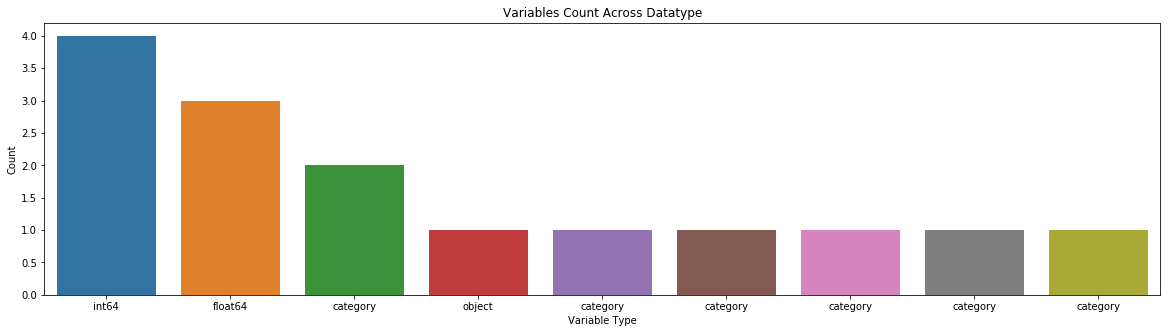

In [42]:
dataTypeDf = pd.DataFrame(dataset.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

#### Missing Values Analysis

Once we get hang of the data and columns, next step we geneally is to find out whether we have any missing values in our data. Luckily we dont have any missing value in the dataset. One way which I generally prefer to visualize missing value in the dataset is through "missingno".

Its a quiet handy library to quickly visualize variables for missing values. As I mentioned earlier we got lucky this time as there no missing value in the dataset.


In [43]:
# Checking the missing values

missing_df =dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(dataset.shape[0]-missing_df['Missing Values Count'])/dataset.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,season,0,100.0
1,holiday,0,100.0
2,workingday,0,100.0
3,weather,0,100.0
4,temp,0,100.0
5,atemp,0,100.0
6,humidity,0,100.0
7,windspeed,0,100.0
8,casual,0,100.0
9,registered,0,100.0



# Outliers Analysis

At first look, "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).But in addition to that, following inferences can also been made from the simple boxplots given below.

    Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.
    The boxplot with "Hour Of The Day" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.
    Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from from figure 4.



[Text(0,0.5,'Count'),
 Text(0.5,0,'Working Day'),
 Text(0.5,1,'Box Plot On Count Across Working Day')]

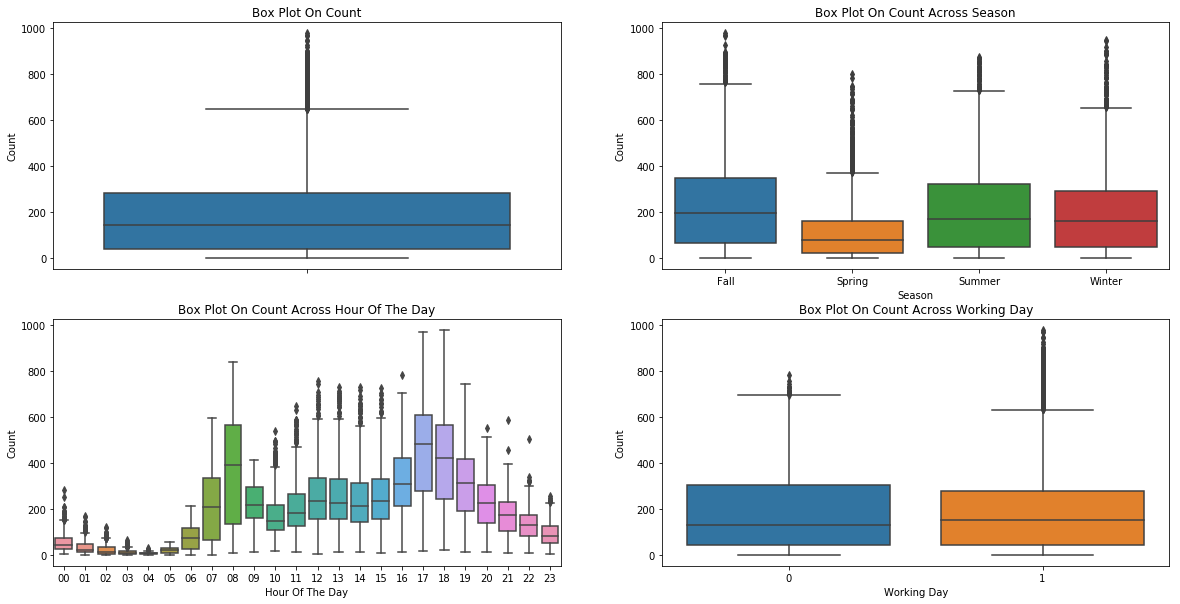

In [44]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sn.boxplot(data=dataset,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=dataset,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=dataset,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=dataset,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [45]:
dailyDataWithoutOutliers = dataset[np.abs(dataset["count"]-dataset["count"].mean())<=(3*dataset["count"].std())]

In [46]:
print ("Shape Of The Before Ouliers: ",dataset.shape)
print ("Shape Of The After Ouliers: ",dataset.shape)

('Shape Of The Before Ouliers: ', (10886, 15))
('Shape Of The After Ouliers: ', (10886, 15))



# Correlation Analysis

One common to understand how a dependent variable is influenced by features (numerical) is to fit a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

    temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
    windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
    "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
    "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.

Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".


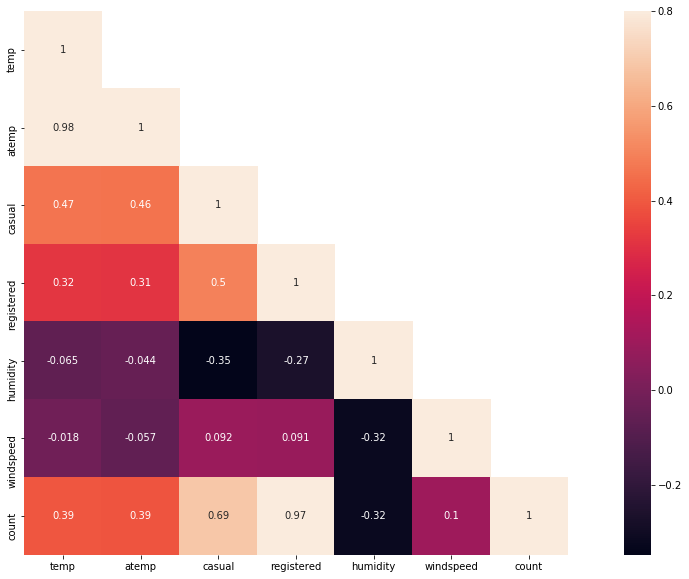

In [47]:


corrMatt = dataset[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)



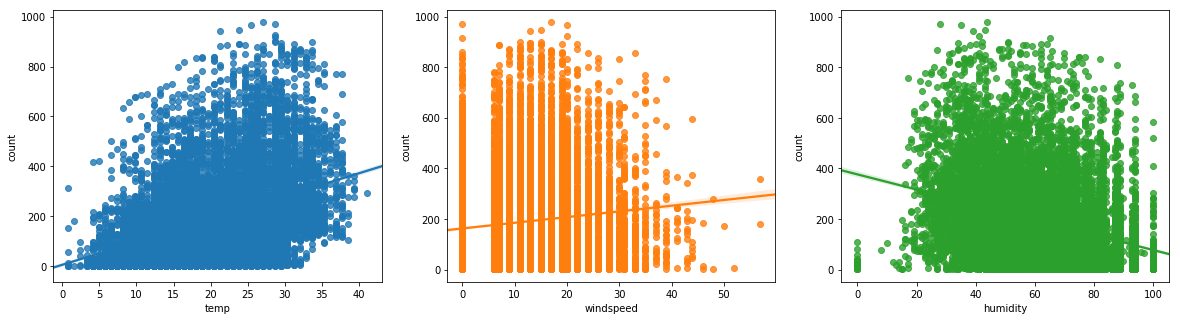

In [48]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sn.regplot(x="temp", y="count", data=dataset,ax=ax1)
sn.regplot(x="windspeed", y="count", data=dataset,ax=ax2)
sn.regplot(x="humidity", y="count", data=dataset,ax=ax3)


# Visualizing Distribution Of Data

As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.348699012122978, 4.562423868087808, 0.9581176780909615))

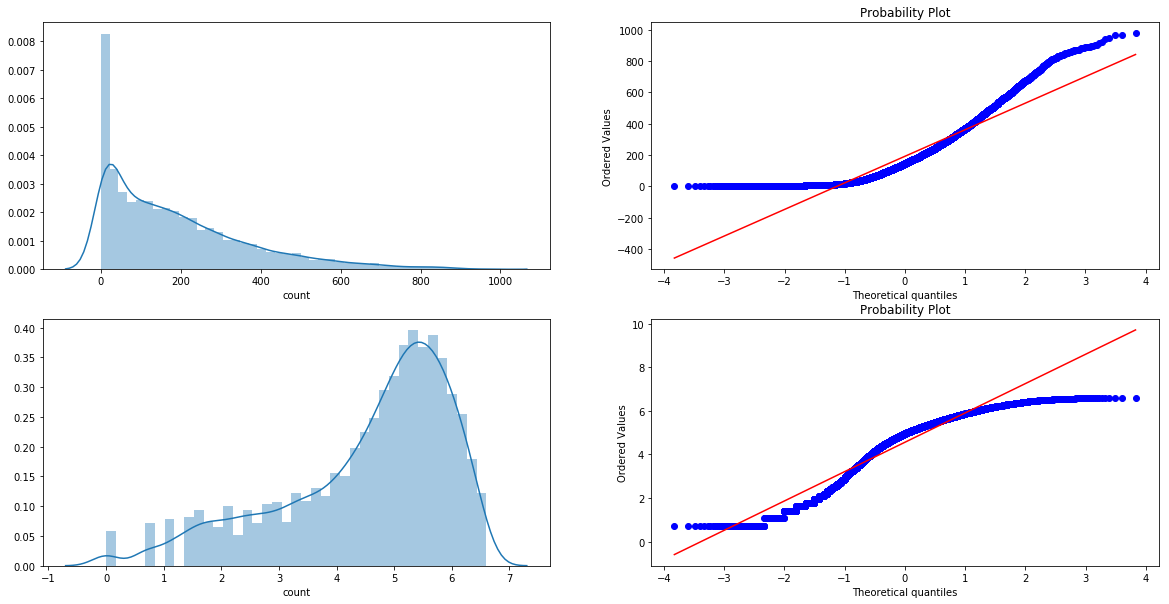

In [49]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(20, 10)
sn.distplot(dataset["count"],ax=axes[0][0])
stats.probplot(dataset["count"], dist='norm', fit=True, plot=axes[0][1])
sn.distplot(np.log(dailyDataWithoutOutliers["count"]),ax=axes[1][0])
stats.probplot(np.log1p(dailyDataWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])


# Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

    It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season.Therefore June, July and August has got relatively higher demand for bicycle.
    On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.
    Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.
    The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user.



[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across User Type'),
 None]

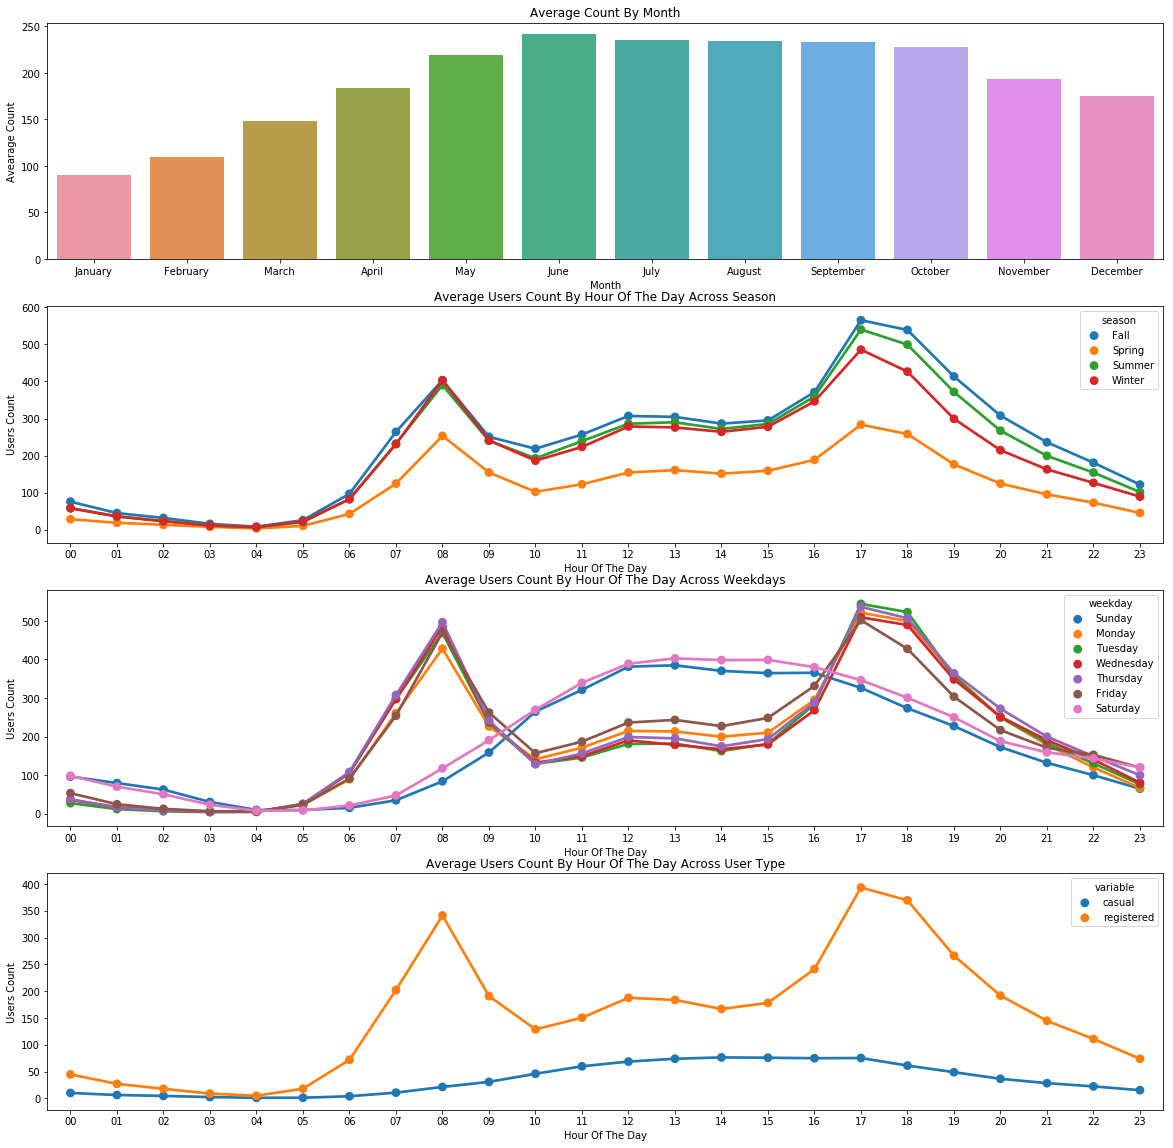

In [50]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(20,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(dataset.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(dataset.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(dataset.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(dataset[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')



## So we have visualized the data to a greater extent.So lets go and build some models and see how close we can predict the results


# Filling 0's In windspeed Using Random Forest

## Lets Read In Train And Test Data


In [ ]:
dataTrain = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")

In [ ]:
# Combine Train and Test datasets

data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

[Text(0,0.5,'Count'),
 Text(0.5,0,'Windspeed Values'),
 Text(0.5,1,'Count Of Windspeed Values Before Imputing'),
 None]

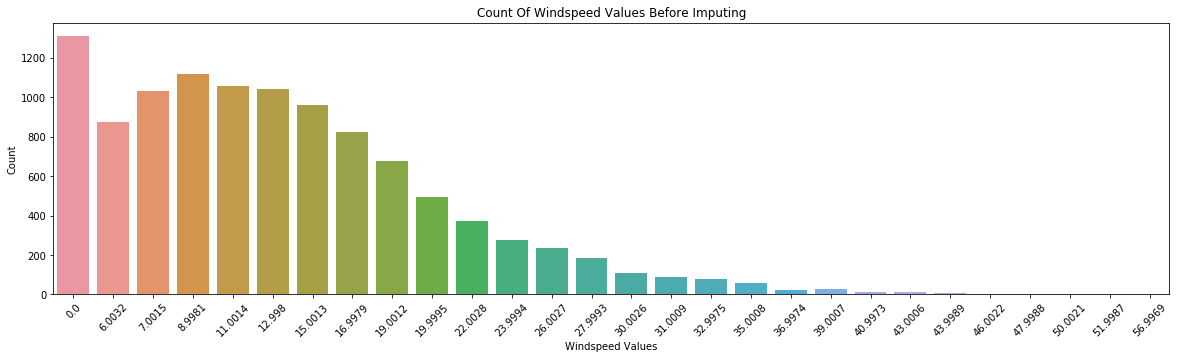

In [53]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
windspeed = pd.DataFrame(dataset.windspeed.value_counts()).reset_index()
plt.xticks(rotation=45) 
sn.barplot(data=windspeed,x="index",y="windspeed",ax=ax)
ax.set(xlabel='Windspeed Values', ylabel='Count',title="Count Of Windspeed Values Before Imputing",label='big')

## Random Forest Model To Predict 0's In Windspeed

In [59]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

('This dataset contains ', 10886, 'rows')
('This dataset contains ', 15, 'columns')


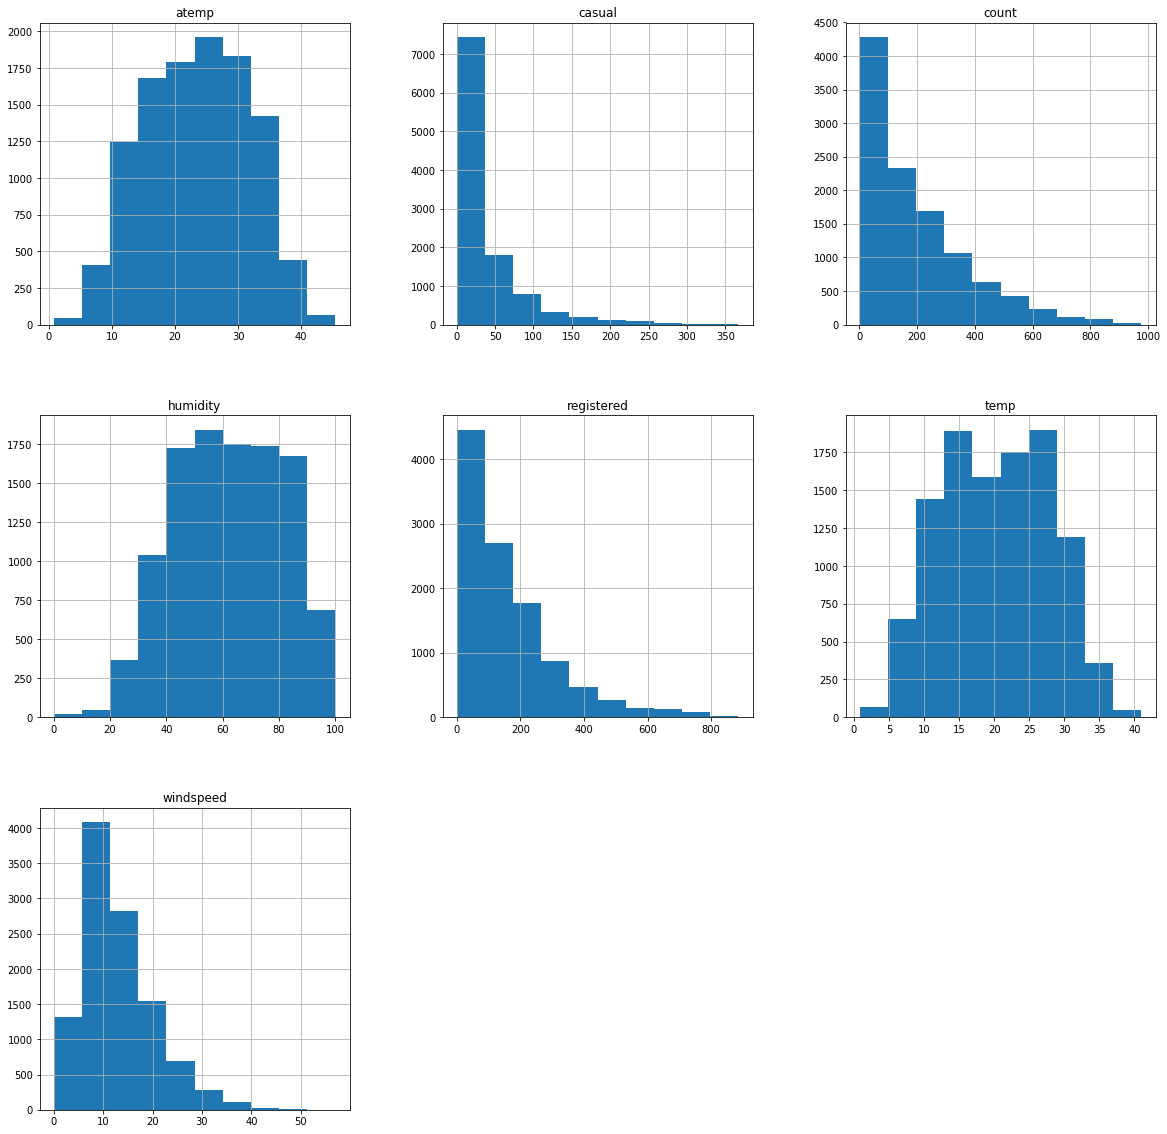

In [60]:
# Plot histograms for each variable

dataset.hist(figsize = (20, 20))
plt.show()

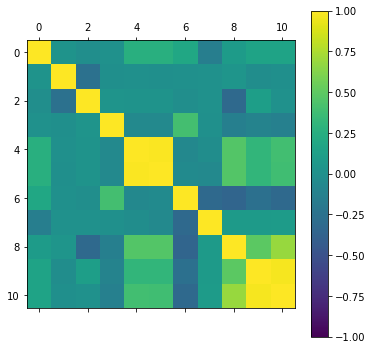

In [7]:
# Pandas Scatter Matrix

from pandas.plotting import scatter_matrix

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

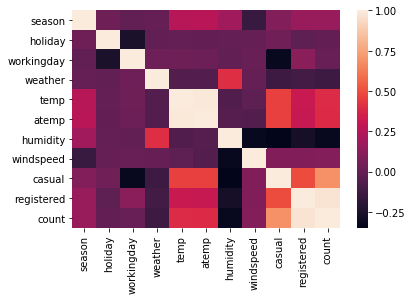

In [8]:
# Generating the correlation heatmap

corr = dataset.corr()
sns.heatmap(corr)

In [61]:
dataset.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
weekday       category
month         category
dtype: object

In [10]:
dataset.columns.unique()


Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered',
       u'count'],
      dtype='object')

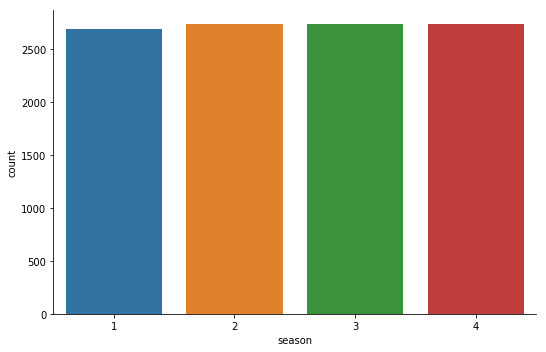

In [11]:
#sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1)
sns.factorplot(x='season',data=dataset,kind='count',size=5,aspect=1.5)

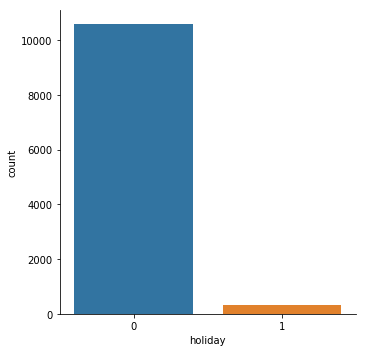

In [12]:
#holiday
dataset.holiday.value_counts()
sns.factorplot(x='holiday',data=dataset,kind='count',size=5,aspect=1) # majority of data is for non holiday days.

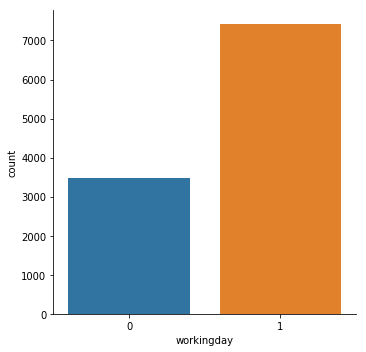

In [16]:
#holiday
dataset.workingday.value_counts()
sns.factorplot(x='workingday',data=dataset,kind='count',size=5,aspect=1) # majority of data is for working days.

In [13]:
#weather
dataset.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

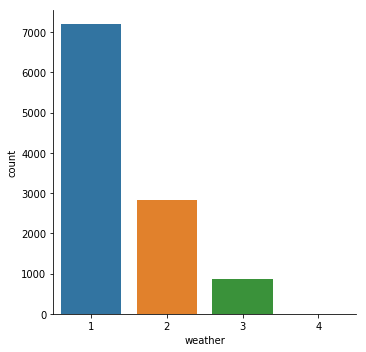

In [14]:
sns.factorplot(x='weather',data=dataset,kind='count',size=5,aspect=1)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

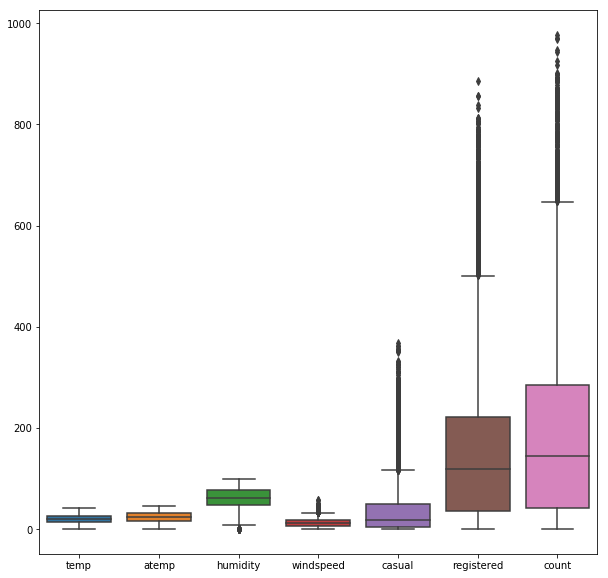

In [15]:
# just to visualize.
sns.boxplot(data=dataset[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

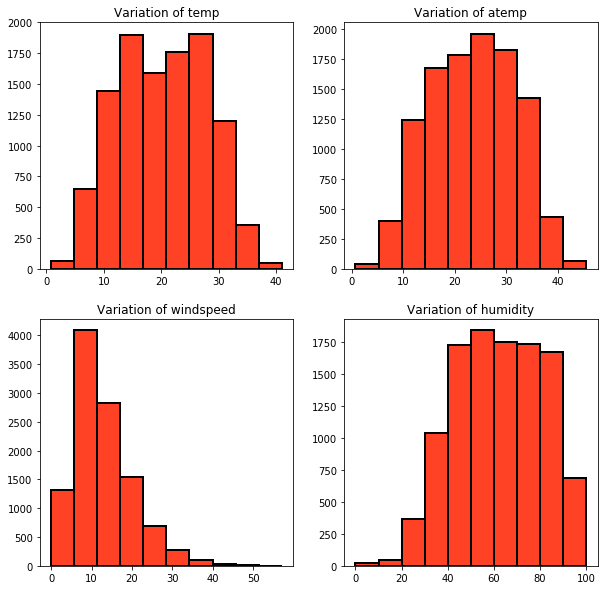

In [82]:
# can also be visulaized using histograms for all the continuous variables.
dataset.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=dataset,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=dataset,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=dataset,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=dataset,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

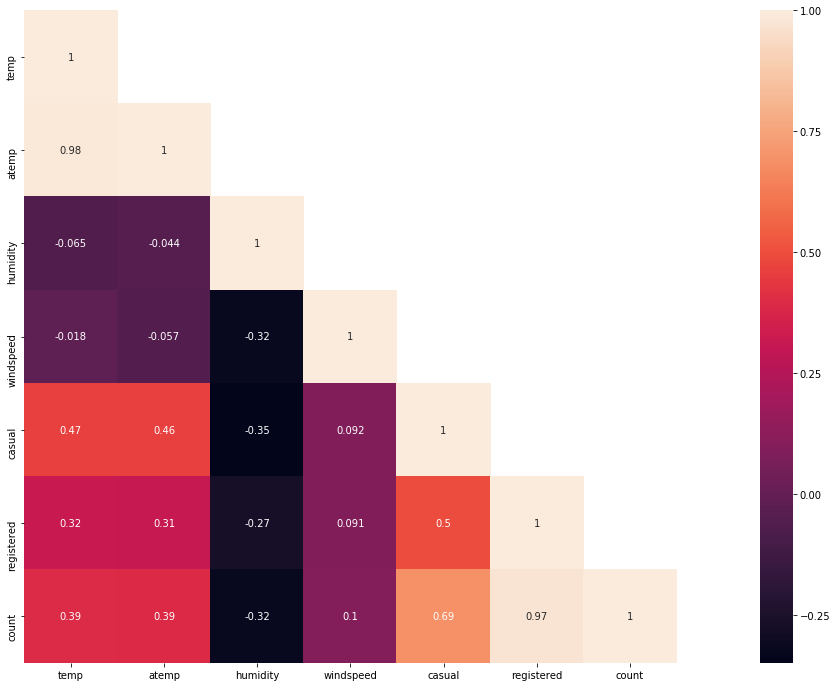

In [80]:
#corelation matrix.
cor_mat= dataset[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [62]:
#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification


# Let's see how Count Varies with Different Features

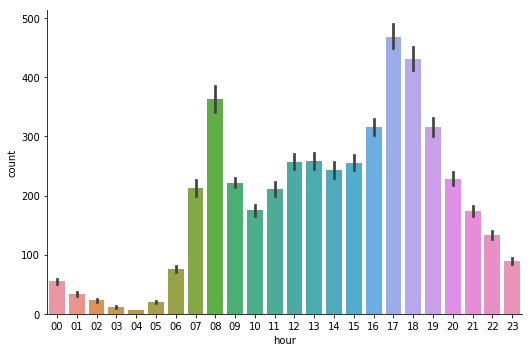

In [66]:
# with hour.
sns.factorplot(x="hour",y="count",data=dataset,kind='bar',size=5,aspect=1.5)

Do Note that the highest demand is in hours from say 7-10 and the from 15-19. this is bcoz in most of the metroploitan cities this is the peak office time and so more people would be renting bikes. this is just one of the plausible reason

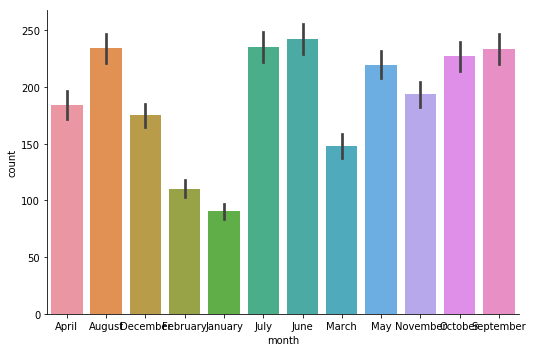

In [67]:
sns.factorplot(x="month",y="count",data=dataset,kind='bar',size=5,aspect=1.5)
# note that month affects season and that effects wheteher people take bike or not. like climate conditions rainy,hazy etc... .

In [76]:
# # # same for weather. this is bcoz this will enhance features.
weather=pd.get_dummies(dataset['weather'],prefix='weather')
df=pd.concat([dataset,weather],axis=1)

In [77]:
# # # now can drop weather and season.
dataset.drop(['season','weather'],inplace=True,axis=1)
dataset.head()



,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,0,0,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,0,0,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,0,0,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,0,0,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,0,0,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


Most Importantly, Do split the date and time as the time of day is expected to effect the no of bikes. for eg at office hours like early mornning or evening one would expect a greater demand of rental bikes.

In [72]:
x_train,x_test,y_train,y_test=train_test_split(dataset.drop('count',axis=1),dataset['count'],test_size=0.25,random_state=42)

# Advanced Data Visualization